In [ ]:
from config import *
from cluster import *
from visualizer import *
import pandas as pd
%matplotlib inline
from analyzer import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]


In [20]:
days = pd.read_csv(CLUSTERED_DAYS_PATH_OUT)

In [29]:
df = pd.read_csv(DAYS_PATH_IN)
df = df.set_index(df['index'])
df.drop('2018-03-21', axis = 0, inplace=True)
df.drop('2018-03-22', axis = 0, inplace = True)
df.fillna(0, inplace = True)
del df['index']
null_columns = df.columns[df.isnull().any()]
#print(null_columns)
#print(df[df.isnull().any(axis=1)][null_columns].head())
for null_column in null_columns:
    print("Missing value of \t{}\t on \t{}".format(null_column,df[df[null_column].isnull()].index.values[0]))
score = dict()
for i in range(3,20):
    days, score[i] = cluster_agglomeration(df, i)

{'nclusters': 3, 'silhouette': 0.017459613336211072}
(179,)
{'nclusters': 3, 'silhouette': 0.017459613336211072, 'calinski_harabaz': 17.161209185333213}
Estimated number of clusters: 3
Silhouette Coefficient: 0.017
{'nclusters': 4, 'silhouette': 0.082516861398368002}
(179,)
{'nclusters': 4, 'silhouette': 0.082516861398368002, 'calinski_harabaz': 48.172959990324685}
Estimated number of clusters: 4
Silhouette Coefficient: 0.083
{'nclusters': 5, 'silhouette': -0.04374511774916278}
(179,)
{'nclusters': 5, 'silhouette': -0.04374511774916278, 'calinski_harabaz': 36.432764695084941}
Estimated number of clusters: 5
Silhouette Coefficient: -0.044
{'nclusters': 6, 'silhouette': -0.10602694963475265}
(179,)
{'nclusters': 6, 'silhouette': -0.10602694963475265, 'calinski_harabaz': 29.031704988657417}
Estimated number of clusters: 6
Silhouette Coefficient: -0.106
{'nclusters': 7, 'silhouette': -0.11944293356817437}
(179,)
{'nclusters': 7, 'silhouette': -0.11944293356817437, 'calinski_harabaz': 24.05

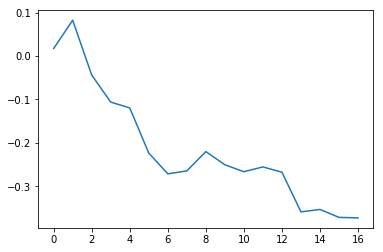

In [30]:
plt.plot(list(score.values()))

In [31]:
days = cluster_agglomeration(df, 8)[0] 

{'nclusters': 8, 'silhouette': -0.22346952182027641}
(179,)
{'nclusters': 8, 'silhouette': -0.22346952182027641, 'calinski_harabaz': 21.865604277378861}
Estimated number of clusters: 8
Silhouette Coefficient: -0.223


In [32]:
days.to_csv(CLUSTERED_DAYS_PATH_OUT)

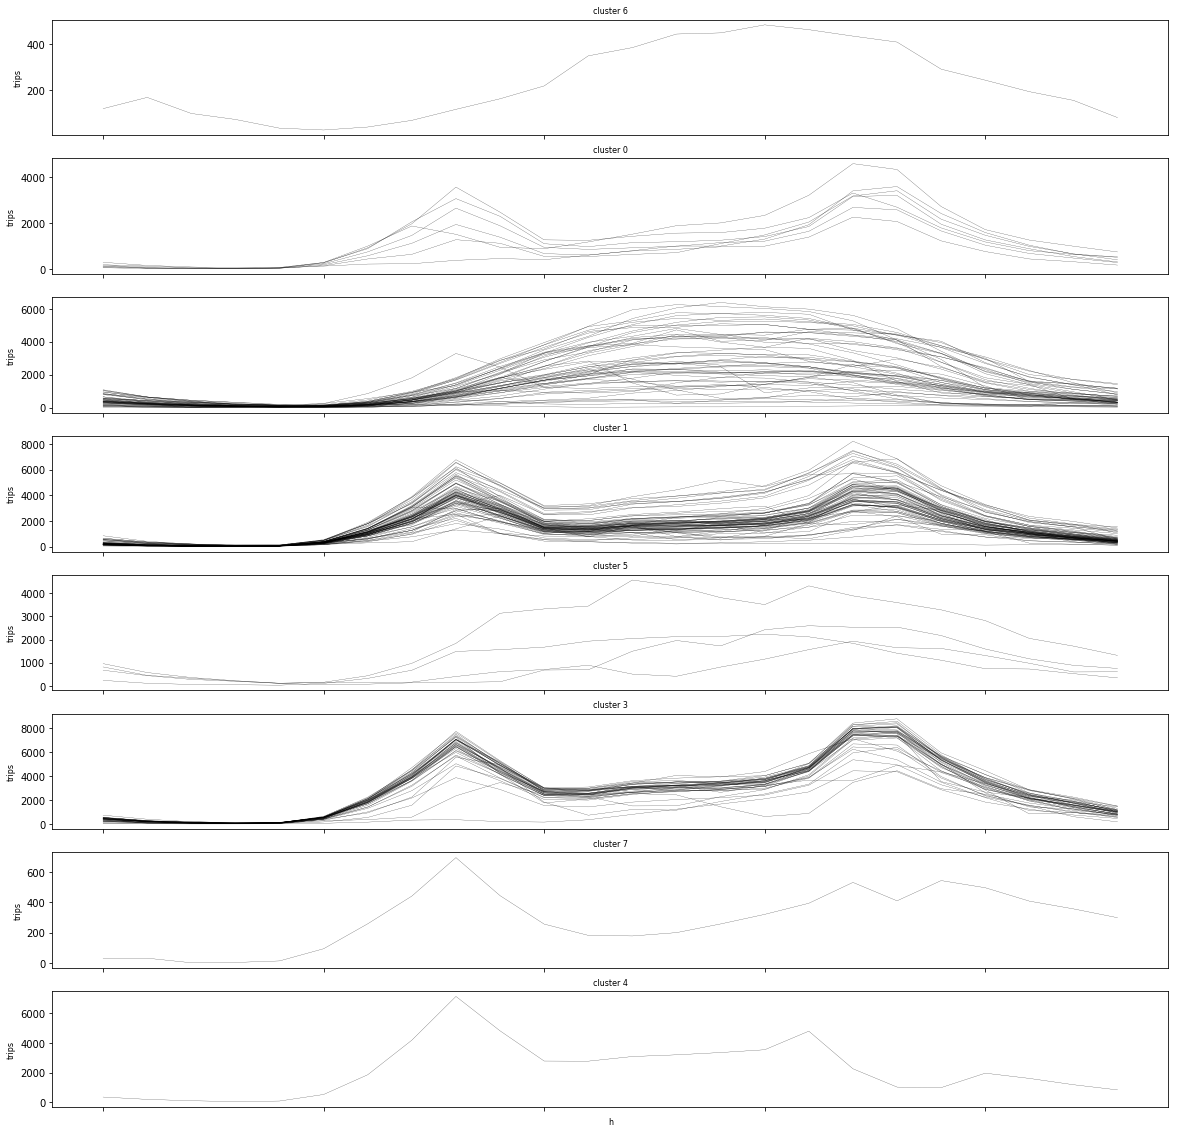

In [37]:
visualize()

In [16]:
trips.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender
starttime,,,,,,,,,,,,
2018-01-01 00:01:51,196,315,40.703554,-74.006702,259,40.701221,-74.012342,18534,Annual Membership,Subscriber,1997.0,1
2018-01-01 00:02:44,207,3224,40.739974,-74.005139,470,40.743453,-74.000040,19651,Annual Membership,Subscriber,1978.0,1
2018-01-01 00:03:15,613,386,40.714948,-74.002345,2008,40.705693,-74.016777,21678,Annual Membership,Subscriber,1982.0,1
2018-01-01 00:06:44,375,466,40.743954,-73.991449,325,40.736245,-73.984738,29822,Annual Membership,Subscriber,1982.0,1
2018-01-01 00:06:57,402,438,40.727791,-73.985649,380,40.734011,-74.002939,30722,Annual Membership,Subscriber,1989.0,1


In [19]:
days.cluster_id

0      4
1      2
2      2
3      0
4      0
5      0
6      0
7      5
8      5
9      5
10     5
11     5
12     0
13     0
14     0
15     5
16     5
17     5
18     5
19     0
20     0
21     5
22     2
23     5
24     5
25     5
26     0
27     0
28     5
29     5
      ..
88     0
89     2
90     5
91     5
92     5
93     2
94     0
95     0
96     5
97     5
98     5
99     5
100    5
101    0
102    0
103    1
104    5
105    5
106    5
107    5
108    0
109    0
110    1
111    1
112    5
113    1
114    5
115    0
116    0
117    5
Name: cluster_id, Length: 118, dtype: int64